## Why Regularization?
##### Sometimes what happens is that our Machine learning model performs well on the training data but does not perform well on the unseen or test data.

##### It means the model is not able to predict the output or target column for the unseen data by introducing noise in the output, and hence the model is called an overfitted model.

Let’s understand the meaning of “Noise” in a brief manner:

##### By noise we mean those data points in the dataset which don’t really represent the true properties of your data, but only due to a random chance.

So, to deal with the problem of overfitting we take the help of regularization techniques.

## What is Regularization?
👉 It is one of the most important concepts of machine learning. This technique prevents the model from overfitting by adding extra information to it.

👉 It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique forces us not to learn a more complex    or flexible model, to avoid the problem of overfitting.

👉 Now, let’s understand the “How flexibility of a model is represented?”
   For regression problems, the increase in flexibility of a model is represented by an increase in its coefficients, which are calculated from the         regression line.

👉 In simple words, “In the Regularization technique, we reduce the magnitude of the independent variables by keeping the same number of variables”.
     It maintains accuracy as well as a generalization of the model.

## Regularization Types-

#### - L1 regularization (lasso regression)
#### - L2 regularization (ridge regression)


### L1 regularization (lasso regression)
👉 Lasso regression is another variant of the regularization technique used to reduce the complexity of the model. It stands for Least Absolute and Selection Operator.

👉 This is a regularization technique used in feature selection selection using a Shrinkage method also referred as the penalized regression method.

👉Lasso regression magnitude of coefficient can be exactly zero.

👉 It is similar to the Ridge Regression except that the penalty term includes the absolute weights instead of a square of weights. Therefore, the           optimization function becomes:

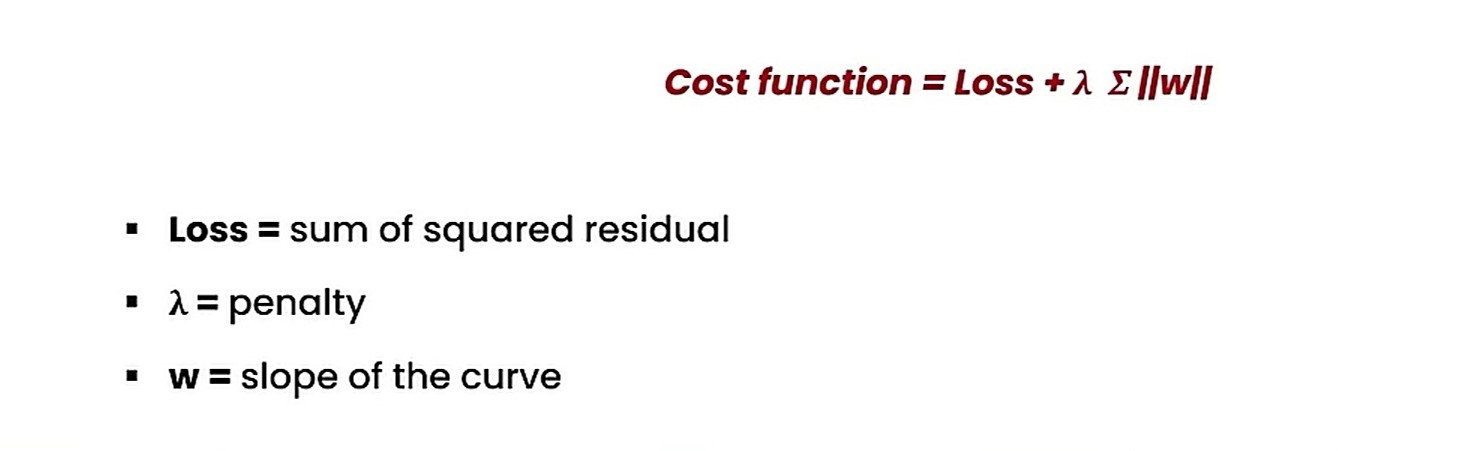

### L2 regularization (ridge regression)¶

👉 Ridge regression is one of the types of linear regression in which we introduce a small amount of bias, known as Ridge regression penalty so that we can get better long-term predictions.

👉 Ridge regression, also known as L2 regularization, is an extension to linear regression that introduce a regularization to reduce model complexity and help prevent overfitting.

👉 Ridge regression is working value/magnitude of coefficient is almost equal to zero.

👉 In Statistics, it is known as the L-2 norm.

👉 In this technique, the cost function is altered by adding the penalty term (shrinkage term), which multiplies the lambda with the squared weight of each individual feature. Therefore, the optimization function(cost function) becomes:

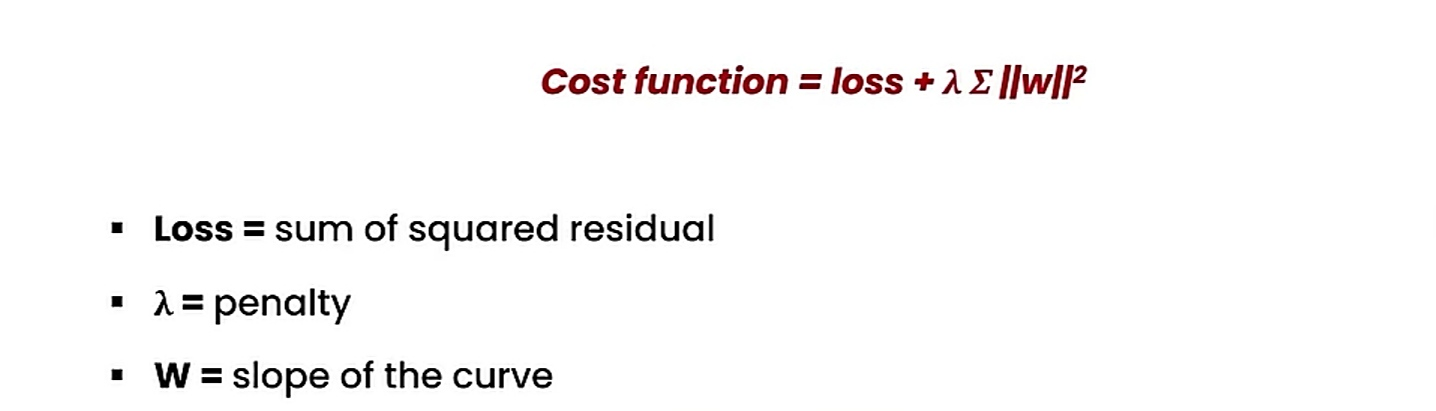

### Regulization (PRACTICAL)

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
dataset = pd.read_csv('House Price Prediction Dataset.csv')
dataset.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [8]:
# data cleaning
dataset.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [10]:
print(dataset['Location'].unique())

['Downtown' 'Suburban' 'Urban' 'Rural']


In [17]:
df1 = dataset[pd.to_numeric(dataset['Location'], errors='coerce').notna()]

In [19]:
dataset['Location'] = pd.to_numeric(dataset['Location'], errors='coerce').fillna(0)

In [20]:
df2 =  dataset[pd.to_numeric(dataset['Condition'], errors='coerce').notna()]

In [26]:
dataset['Condition'] = pd.to_numeric(dataset['Condition'], errors='coerce').fillna(0)

In [27]:
df3 = dataset[pd.to_numeric(dataset['Garage'], errors='coerce').notna()]

In [30]:
 dataset['Garage'] = pd.to_numeric(dataset['Garage'], errors='coerce').fillna(0)

In [31]:
dataset.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0.0,0.0,0.0,149919
1,2,4272,5,4,3,1958,0.0,0.0,0.0,424998
2,3,3592,2,2,3,1938,0.0,0.0,0.0,266746
3,4,966,4,2,2,1902,0.0,0.0,0.0,244020
4,5,4926,1,4,2,1975,0.0,0.0,0.0,636056


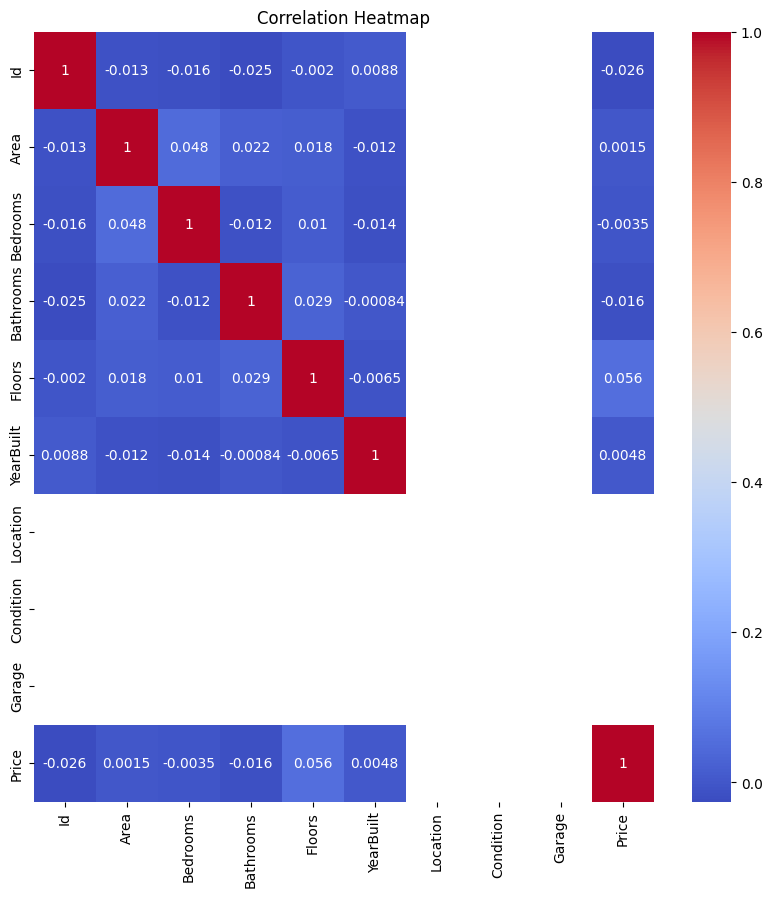

In [34]:
# first we will chcek the linear regression will apply on this dataset or not
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [36]:
x = dataset.iloc[:,:-1]
y = dataset['Price']

In [39]:
# scaling
sc =  StandardScaler()
sc.fit(x)
sc.transform(x)

array([[-1.731185  , -1.10147065,  1.40179052, ...,  0.        ,
         0.        ,  0.        ],
       [-1.72945295,  1.14748543,  1.40179052, ...,  0.        ,
         0.        ,  0.        ],
       [-1.7277209 ,  0.62231712, -0.70458141, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.7277209 , -1.33161794,  1.40179052, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.72945295,  0.9853011 , -0.00245743, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.731185  ,  0.15661639,  1.40179052, ...,  0.        ,
         0.        ,  0.        ]])

In [41]:
# convert into dataframe
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [42]:
# now splitting of data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Linear Regression

In [44]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
lr.score(x_test, y_test)*100

-1.1896515104903527

#### Finding errors

In [68]:
 mean_squared_error(y_test,lr.predict(x_test))

78724363458.53015

In [69]:
mean_absolute_error(y_test,lr.predict(x_test))

244166.16705106283

In [73]:
print(np.sqrt( mean_squared_error(y_test,lr.predict(x_test))))

280578.6225971789


In [74]:
# all errors are high

In [47]:
# this is the very very poor accuracy of the data ,model is not good

In [48]:
lr.coef_

array([-7.09192405e+03, -3.41603185e+02,  3.94547528e+00, -1.12315656e+04,
        1.89002917e+04,  4.00655730e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

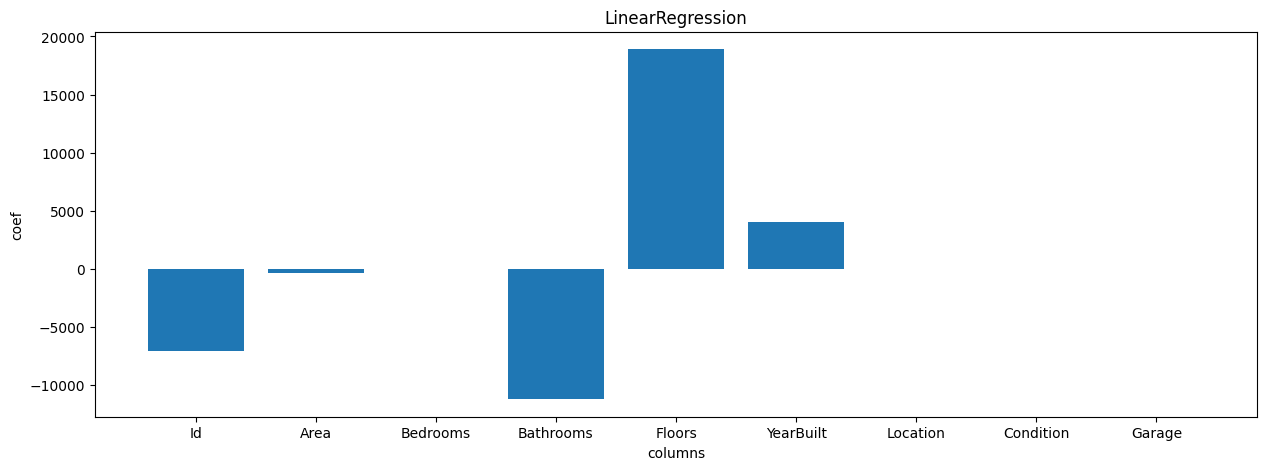

In [53]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

## For Lasso

In [58]:
la = Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_test, y_test)*100

-1.189649733913356

In [59]:
# poor accuracy

In [79]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt( mean_squared_error(y_test,la.predict(x_test))))

78724362076.37407
244166.1652127748
280578.6201341329


In [ ]:
# errors are also high in Lasso

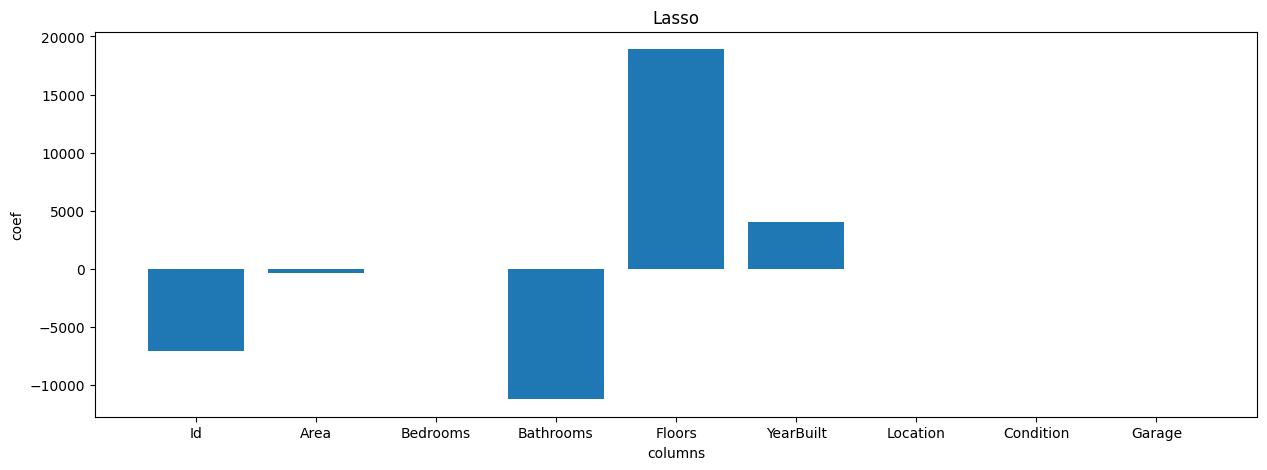

In [60]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title('Lasso')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

# For Ridge

In [62]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test, y_test)*100

-1.1785004456139392

In [63]:
# poor accuracy

In [80]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt( mean_squared_error(y_test,ri.predict(x_test))))

78715688060.68881
244154.10573375493
280563.1623372691


In [82]:
# Ridge is little work good as compared to linear and lasso

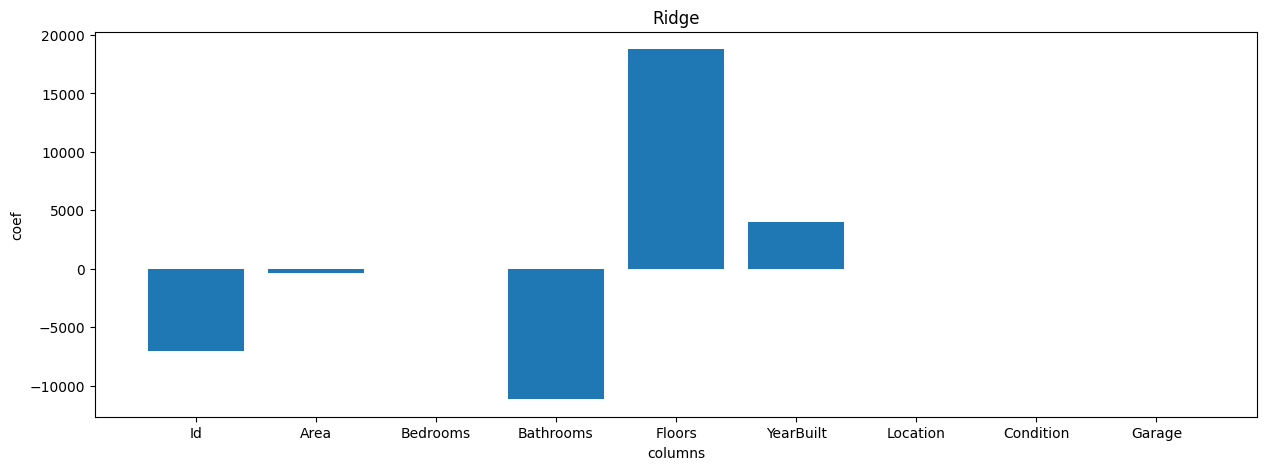

In [64]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title('Ridge')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

#### compare their coefficient value

In [84]:
df = pd.DataFrame({'col_name':x.columns,'LinearRegression':lr.coef_,'Lasso':la.coef_,'Ridge':ri.coef_})
df

,col_name,LinearRegression,Lasso,Ridge
0,Id,-7091.924054,-7091.914046,-7047.286875
1,Area,-341.603185,-341.593007,-338.876752
2,Bedrooms,3.945475,3.935032,3.945156
3,Bathrooms,-11231.565593,-11231.555410,-11159.272029
4,Floors,18900.291750,18900.281405,18781.760864
5,YearBuilt,4006.557299,4006.547444,3981.523619
6,Location,0.000000,0.000000,0.000000
7,Condition,0.000000,0.000000,0.000000
8,Garage,0.000000,0.000000,0.000000
